#  Xgboost  For Iris Dataset in R

## Load Dataset

In [173]:
data("iris")

## Data Conversion

In [174]:
Species <-  iris$Species

In [175]:
label = as.integer(iris$Species)-1

In [176]:
iris$Species = NULL

In [177]:
n = nrow(iris)

## Train Test Split

In [178]:
train.index = sample(n,floor(0.75*n))
train.data = as.matrix(iris[train.index,])
test.data = as.matrix(iris[-train.index,])

In [179]:
train.label = label[train.index]
test.label = label[-train.index]

In [180]:
dim(train.data) ; dim(test.data)

[1] 112   4

[1] 38  4

## xgb.Dmatrix Transformation

In [181]:
library(xgboost)
xgb.train = xgb.DMatrix(data=train.data,label=train.label)
xgb.test = xgb.DMatrix(data=test.data,label=test.label)

In [182]:
xgb.train

xgb.DMatrix  dim: 112 x 4  info: label  colnames: yes

In [183]:
xgb.test

xgb.DMatrix  dim: 38 x 4  info: label  colnames: yes

## Defining Parameters

In [184]:
num_class = length(levels(Species))
params = list(
  booster="gbtree",
  eta=0.001,
  max_depth=5,
  gamma=3,
  subsample=0.75,
  colsample_bytree=1,
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

## Model Training

In [185]:
xgb.fit=xgb.train(
  params=params,
  data=xgb.train,
  nrounds=10000,
  nthreads=1,
  early_stopping_rounds=10,
  watchlist=list(val1=xgb.train,val2=xgb.test),
  verbose=0
)

In [186]:
xgb.fit

##### xgb.Booster
raw: 3.7 Mb 
call:
  xgb.train(params = params, data = xgb.train, nrounds = 10000, 
    watchlist = list(val1 = xgb.train, val2 = xgb.test), verbose = 0, 
    early_stopping_rounds = 10, nthreads = 1)
params (as set within xgb.train):
  booster = "gbtree", eta = "0.001", max_depth = "5", gamma = "3", subsample = "0.75", colsample_bytree = "1", objective = "multi:softprob", eval_metric = "mlogloss", num_class = "3", nthreads = "1", silent = "1"
xgb.attributes:
  best_iteration, best_msg, best_ntreelimit, best_score, niter
callbacks:
  cb.evaluation.log()
  cb.early.stop(stopping_rounds = early_stopping_rounds, maximize = maximize, 
    verbose = verbose)
# of features: 4 
niter: 3265
best_iteration : 3255 
best_ntreelimit : 3255 
best_score : 0.164217 
nfeatures : 4 
evaluation_log:
    iter val1_mlogloss val2_mlogloss
       1      1.097373      1.097355
       2      1.096100      1.096045
---                                 
    3264      0.191855      0.164228
    

In [193]:
err <- (xgb.fit$evaluation_log)
err

iter,val1_mlogloss,val2_mlogloss
1,1.097373,1.097355
2,1.096100,1.096045
3,1.094837,1.094753
4,1.093615,1.093503
5,1.092424,1.092304
6,1.091207,1.091066
7,1.089983,1.089822
8,1.088771,1.088595
9,1.087664,1.087512
10,1.086423,1.086248


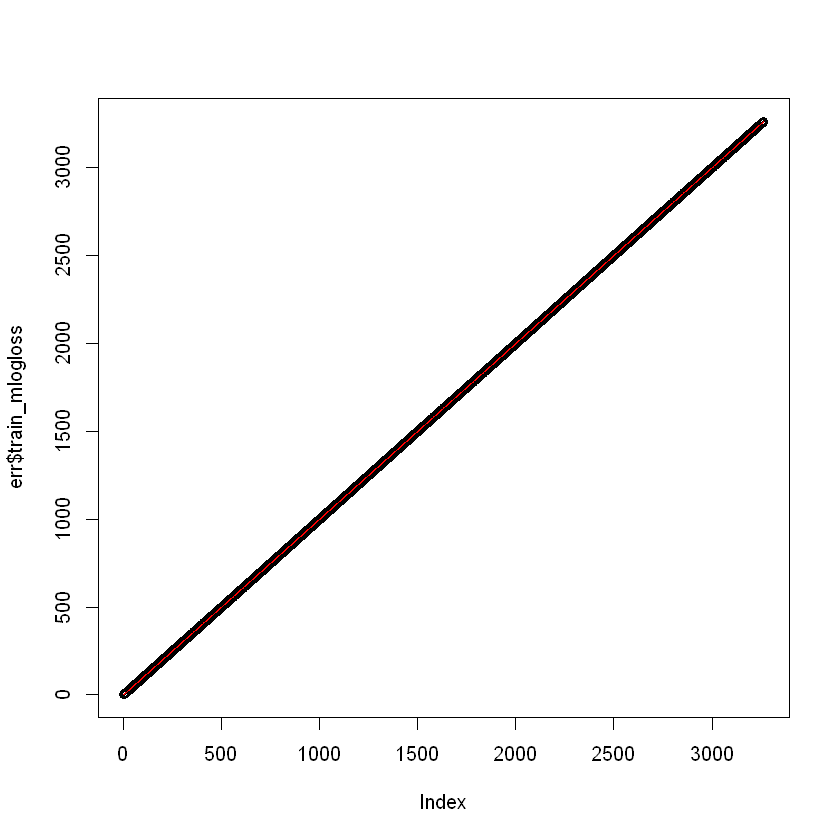

In [195]:
plot(err$iter,err$train_mlogloss,col="black")
lines(err$iter,err$test_mlogloss,col="red")

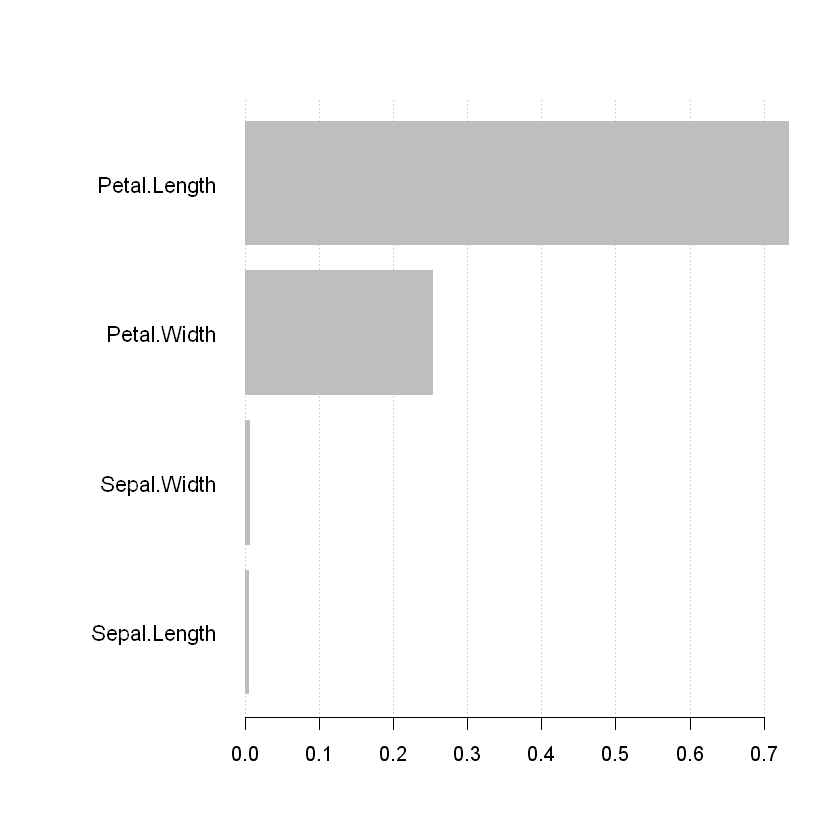

In [194]:
imp <-xgb.importance(colnames(xgb.train),model = xgb.fit)
xgb.plot.importance(imp )

## New Outcomes Prediction

In [190]:
xgb.pred = predict(xgb.fit,test.data,reshape=T)
xgb.pred = as.data.frame(xgb.pred)
colnames(xgb.pred) = levels(Species)
xgb.pred

setosa,versicolor,virginica
0.89981306,0.05688815,0.04329879
0.89718330,0.05964451,0.04317224
0.89718330,0.05964451,0.04317224
0.89981306,0.05688815,0.04329879
0.89871651,0.05803748,0.04324602
0.89416468,0.06280826,0.04302699
0.89718330,0.05964451,0.04317224
0.89981306,0.05688815,0.04329879
0.89585626,0.06103532,0.04310839
0.89871651,0.05803748,0.04324602


## Identify High Probability

In [191]:
xgb.pred$prediction = apply(xgb.pred,1,function(x) colnames(xgb.pred)[which.max(x)])
xgb.pred$label = levels(Species)[test.label+1]
xgb.pred$prediction
xgb.pred$label

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "versicolor" "versicolor" "versicolor" "versicolor"
[16] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "virginica"  "virginica"  "virginica" 
[26] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[31] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "virginica"

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "versicolor" "versicolor" "versicolor" "versicolor"
[16] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "virginica"  "virginica"  "virginica" 
[26] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[31] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "virginica"

## Metrics

In [192]:
result = sum(xgb.pred$prediction==xgb.pred$label)/nrow(xgb.pred)
result

[1] 1

In [196]:
print(paste("Final Accuracy =",sprintf("%1.2f%%", 100*result)))

[1] "Final Accuracy = 100.00%"
